**Importing all the necessary libraries**

In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import keras
from keras.preprocessing.image import ImageDataGenerator 
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from IPython.display import SVG
import seaborn as sns


Using TensorFlow backend.


**Getting Images from the directory**

In [2]:
def get_images(directory):
    Images = []
    Labels = []
    
    for labels in os.listdir(directory):
        if labels == 'glacier': 
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+'/'+labels): 
            image = cv2.imread(directory+ '/'+labels+'/'+image_file) 
            image = cv2.resize(image,(150,150)) 
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1000) 


In [3]:
def get_category(x):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[x]

In [4]:
Images,Labels = get_images('../input/intel-image-classification/seg_train/seg_train')
Images = np.array(Images)
Labels = np.array(Labels)

**Distribution of Images across each category**

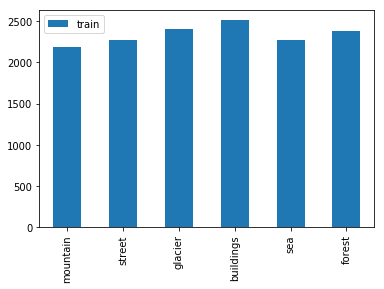

In [5]:
category = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
_,count = np.unique(Labels, return_counts = True)
pd.DataFrame({"train": count}, index = category).plot.bar()
plt.show()


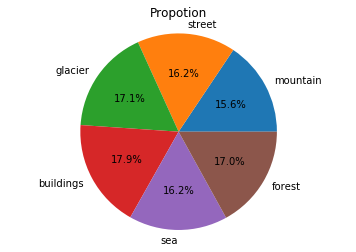

In [6]:
plt.pie(count,explode=(0, 0, 0, 0, 0, 0),labels = category,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Propotion")
plt.show()

In [7]:
def display_image(image,label):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle('15 Images from the Dataset', fontsize = 20)
    for i in range(15):
        index = np.random.randint(Images.shape[0])
        plt.subplot(5,5,i+1)
        plt.imshow(image[index])
        plt.xticks([]) #Scale doesn't appear
        plt.yticks([]) #Scale doesn't apper
        plt.title(get_category(label[index]))
        plt.grid(False)
    plt.show()
 #Maximum 25 images can only be displayed.   

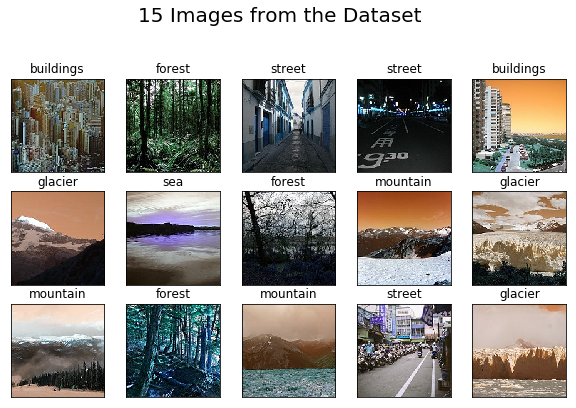

In [8]:
display_image(Images, Labels)

In [9]:
print(Images.shape)
print(Labels.shape)

(14034, 150, 150, 3)
(14034,)


**Neural Network Architecture**

In [10]:
model = Models.Sequential()
model.add(Layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(128,activation='relu'))
model.add(Layers.Dense(64,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 256)     7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 128)     295040    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       1

**Now we will fit the model**

In [11]:
trained = model.fit(Images,Labels,epochs=30,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/30
9823/9823 [==============================] - 48s 5ms/sample - loss: 1.5101 - accuracy: 0.3988 - val_loss: 1.1299 - val_accuracy: 0.5676
Epoch 2/30
9823/9823 [==============================] - 41s 4ms/sample - loss: 1.1626 - accuracy: 0.5532 - val_loss: 0.9854 - val_accuracy: 0.6229
Epoch 3/30
9823/9823 [==============================] - 41s 4ms/sample - loss: 0.9953 - accuracy: 0.6309 - val_loss: 0.7979 - val_accuracy: 0.7062
Epoch 4/30
9823/9823 [==============================] - 41s 4ms/sample - loss: 0.8666 - accuracy: 0.6920 - val_loss: 0.7561 - val_accuracy: 0.7124
Epoch 5/30
9823/9823 [==============================] - 41s 4ms/sample - loss: 0.7828 - accuracy: 0.7252 - val_loss: 0.6732 - val_accuracy: 0.7523
Epoch 6/30
9823/9823 [==============================] - 41s 4ms/sample - loss: 0.7043 - accuracy: 0.7580 - val_loss: 0.6374 - val_accuracy: 0.7746
Epoch 7/30
9823/9823 [==============================] - 41s 4ms/sample

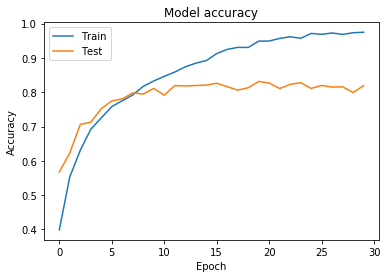

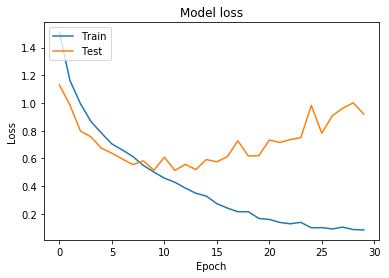

In [12]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Overfitting is clearly visible**

**Using Image Augmentation**

In [13]:
train_generator = ImageDataGenerator(rescale = 1/255, zoom_range = 0.3, horizontal_flip = True, rotation_range = 30)
train_generator = train_generator.flow(Images, Labels, batch_size = 64, shuffle = False)

In [19]:
history = model.fit_generator(train_generator, epochs = 30, shuffle = False)

Train for 220 steps
Epoch 1/30
220/220 [==============================] - 90s 408ms/step - loss: 0.3852 - accuracy: 0.8685
Epoch 2/30
220/220 [==============================] - 90s 411ms/step - loss: 0.3757 - accuracy: 0.8743
Epoch 3/30
220/220 [==============================] - 90s 408ms/step - loss: 0.3744 - accuracy: 0.8759
Epoch 4/30
220/220 [==============================] - 90s 410ms/step - loss: 0.3869 - accuracy: 0.8725
Epoch 5/30
220/220 [==============================] - 90s 408ms/step - loss: 0.3709 - accuracy: 0.8746
Epoch 6/30
220/220 [==============================] - 90s 409ms/step - loss: 0.3626 - accuracy: 0.8748
Epoch 7/30
220/220 [==============================] - 90s 409ms/step - loss: 0.3487 - accuracy: 0.8836
Epoch 8/30
220/220 [==============================] - 90s 407ms/step - loss: 0.3509 - accuracy: 0.8779
Epoch 9/30
220/220 [==============================] - 89s 405ms/step - loss: 0.3451 - accuracy: 0.8831
Epoch 10/30
220/220 [==============================] 

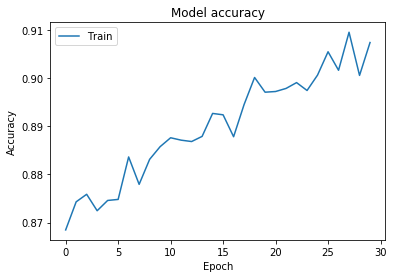

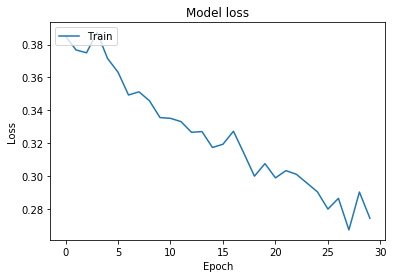

In [20]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [21]:
test_Images,test_Labels = get_images('../input/intel-image-classification/seg_test/seg_test')
test_Images = np.array(test_Images)
test_Labels = np.array(test_Labels)

In [22]:
test_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_generator.flow(test_Images, test_Labels, batch_size = 64, shuffle = False)

In [23]:
evaluate = model.evaluate(test_Images, test_Labels, verbose = 1)

3000/3000 [==============================] - 4s 1ms/sample - loss: 78.3051 - accuracy: 0.6893


In [24]:
print( "Accuracy: "  + str(evaluate[1] * 100) + "%")

Accuracy: 68.93333196640015%


In [25]:
evaluate2 = model.evaluate_generator(test_generator, verbose = 1)

47/47 [==============================] - 4s 95ms/step - loss: 0.3805 - accuracy: 0.8807


In [26]:
print("Accuracy:" + str(evaluate2[1] * 100) + "%")

Accuracy:88.06666731834412%


In [27]:
def get_pred(directory):
    Images = []
    Labels = []
    label = 0
    
    for image_file in os.listdir(directory): 
        image = cv2.imread(directory+ '/' +image_file) 
        image = cv2.resize(image,(150,150)) 
        Images.append(image)
        Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1000) 

In [28]:
pred_Images,pred_Labels = get_pred("../input/intel-image-classification/seg_pred/seg_pred")
pred_Images = np.array(pred_Images)

In [29]:
print(pred_Images.shape)

(7301, 150, 150, 3)


In [30]:
pred_generator = ImageDataGenerator(rescale = 1/255)
pred_generator = pred_generator.flow(pred_Images, batch_size = 64, shuffle = False)

In [31]:
prediction = model.predict_generator(pred_generator, verbose=1)

115/115 [==============================] - 10s 86ms/step


In [32]:
prediction.shape

(7301, 6)